In [13]:
import pandas as pd

# Specify the file path for the CSV file
file_pathnan = "../tweets-data/Combined-File/combined.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_pathnan, encoding="utf-8")

# Drop rows with NaN values in the 'full_text' column
df.dropna(subset=['full_text'], inplace=True)

# Create a new DataFrame 'df_pre' from the 'full_text' column
df_pre = df[['full_text']].reset_index(drop=True)

# Save the new DataFrame to a new CSV file
df_pre.to_csv("data_nonNan.csv", index=False, encoding="utf-8")


In [14]:
# Mencari nilai NaN di kolom 'tweet' menggunakan isna() dan menghitung jumlahnya
nan_count = df_pre['full_text'].isna().sum()

# Menampilkan jumlah nilai NaN
print("Jumlah nilai NaN:", nan_count)

Jumlah nilai NaN: 0


In [15]:
import pandas as pd

# Define the file path
file_pathnonnan = "data_nonNan.csv"

# Define the keyword you want to filter by
keyword = "covid"  # Change this to your desired keyword

# Read the CSV file into a DataFrame with proper encoding
df = pd.read_csv(file_pathnonnan, encoding="utf-8")

# Filter the DataFrame to only include rows where the 'full_text' column contains the keyword
filtered_df = df[df['full_text'].str.contains(keyword, case=False, na=False)]

# Define the output file path based on the keyword
output_file_path = f"filtered_tweets_{keyword}.csv"

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file_path, index=False)

# Display a message indicating where the filtered data is saved
print(f"Filtered tweets with keyword '{keyword}' are saved to '{output_file_path}'")


Filtered tweets with keyword 'covid' are saved to 'filtered_tweets_covid.csv'


In [16]:
import pandas as pd

# Define your custom stop words list
custom_stop_words = ["covid","Covid"]  # Add your custom stop words

# Define the file path
file_pathfiltered = "filtered_tweets_covid.csv"

# Define the keyword you want to filter by
keyword = "covid"  # Change this to your desired keyword

# Read the CSV file into a DataFrame
df = pd.read_csv(file_pathfiltered)

# Filter the DataFrame to only include rows where the 'full_text' column contains the keyword
filtered_df = df[df['full_text'].str.contains(keyword, case=False)]

# Define a function to remove custom stop words from text
def remove_custom_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stop_words]
    return " ".join(filtered_words)

# Apply the remove_custom_stopwords function to the 'full_text' column
filtered_df['full_text'] = filtered_df['full_text'].apply(remove_custom_stopwords)

# Define the output file path based on the keyword
output_file_path = f"filtered_tweets_{keyword}.csv"

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file_path, index=False)

# Display a message indicating where the filtered data is saved
print(f"Filtered tweets with keyword '{keyword}' and custom stop words removed are saved to '{output_file_path}'")


Filtered tweets with keyword 'covid' and custom stop words removed are saved to 'filtered_tweets_covid.csv'


In [18]:
import pandas as pd

# File path untuk file CSV awal
file_pathfilteredkeyword = "filtered_tweets_covid.csv"
df_processed = pd.read_csv(file_pathfilteredkeyword, encoding='utf-8')

# File path untuk daftar kontraksi dan ekspansinya dari 'kbba.txt'
kbba_path = 'kbba.txt'
with open(kbba_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split('\t') for line in lines]

data_singkatan = pd.DataFrame(data, columns=['Kata', 'Asli'])

# Mengonversi DataFrame menjadi kamus (dictionary)
kontraksi_dict = dict(zip(data_singkatan['Kata'], data_singkatan['Asli']))

# Fungsi untuk mengembangkan kontraksi dalam bahasa Indonesia
def expand_contractions_id(text):
    words = text.split()
    expanded_text = [kontraksi_dict[word] if word in kontraksi_dict else word for word in words]
    return ' '.join(expanded_text)

# Memproses kolom 'full_text' untuk mengembangkan kontraksi
df_processed['full_text'] = df_processed['full_text'].apply(expand_contractions_id)

# Menyimpan DataFrame yang telah dimodifikasi ke dalam file CSV baru
output_file_path = "data_cleaned.csv"
df_processed.to_csv(output_file_path, index=False, encoding="utf-8")

# Setelah ini dieksekusi, hasil pemrosesan akan tersimpan dalam "data_cleaned.csv".


In [19]:
import re
import pandas as pd

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# Fungsi untuk mengecilkan huruf
def to_lower(text):
    return text.lower()

# Preprocessing kolom 'full_text'
df_pre['full_text'] = df_pre['full_text'].apply(remove_punctuation)
df_pre['full_text'] = df_pre['full_text'].apply(remove_links)
df_pre['full_text'] = df_pre['full_text'].apply(to_lower)

# Save the new DataFrame to a new CSV file
df_pre.to_csv("data_cleaned.csv", index=False, encoding="utf-8")


In [20]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd

# Inisialisasi stopword remover dari Sastrawi
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Fungsi untuk menghapus stopwords menggunakan Sastrawi
def remove_stopwords(text):
    return stopword_remover.remove(text)

# Menghapus stopwords dari kolom 'full_text'
df_pre['full_text'] = df_pre['full_text'].apply(remove_stopwords)

# Save the new DataFrame to a new CSV file
df_pre.to_csv("data_cleaned.csv", index=False, encoding="utf-8")


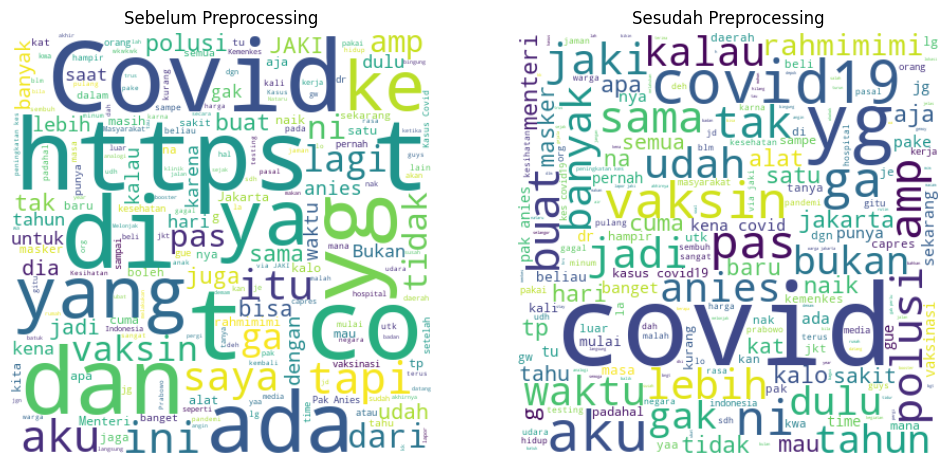

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Baca file CSV sebelum preprocessing
file_path_before = "filtered_tweets_covid.csv"
df_before = pd.read_csv(file_path_before, encoding="utf-8")

# Baca file CSV setelah preprocessing
file_path_after = "data_cleaned.csv"
df_after = pd.read_csv(file_path_after, encoding="utf-8")

# Ubah kolom 'full_text' ke string dan tangani nilai NaN
df_before['full_text'] = df_before['full_text'].astype(str)
df_after['full_text'] = df_after['full_text'].astype(str)

# Gabungkan semua teks tweet menjadi satu string
combined_text_before = ' '.join(df_before['full_text'])
combined_text_after = ' '.join(df_after['full_text'])

# Buat objek WordCloud untuk sebelum dan sesudah preprocessing
wordcloud_before = WordCloud(width=400, height=400, background_color='white').generate(combined_text_before)
wordcloud_after = WordCloud(width=400, height=400, background_color='white').generate(combined_text_after)

# Tampilkan gambar Word Cloud secara bersampingan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title('Sebelum Preprocessing')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title('Sesudah Preprocessing')

plt.show()

